<a href="https://colab.research.google.com/github/SIDIBEMoussa/Tanzania-Tourism-Prediction/blob/main/Version_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [535]:
import warnings
warnings.filterwarnings('ignore')

In [536]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [537]:
train_path = "https://raw.githubusercontent.com/SIDIBEMoussa/Tanzania-Tourism-Prediction/refs/heads/main/Train.csv"
test_path = "https://raw.githubusercontent.com/SIDIBEMoussa/Tanzania-Tourism-Prediction/refs/heads/main/Test.csv"
sub_data = "https://raw.githubusercontent.com/SIDIBEMoussa/Tanzania-Tourism-Prediction/refs/heads/main/SampleSubmission.csv"

In [538]:
train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)
sub_set = pd.read_csv(sub_data)

In [539]:
train_set.head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0


In [540]:
def countplot(df,col):
    # Trier le DataFrame par la colonne spécifiée en ordre décroissant de fréquence
    order = df[col].value_counts().index

    plt.rcParams["font.size"] = 6
    plt.figure(figsize=(13,5))

    # Utiliser l'argument 'order' pour spécifier l'ordre des barres
    sns.countplot(x=df[col], order=order)

    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

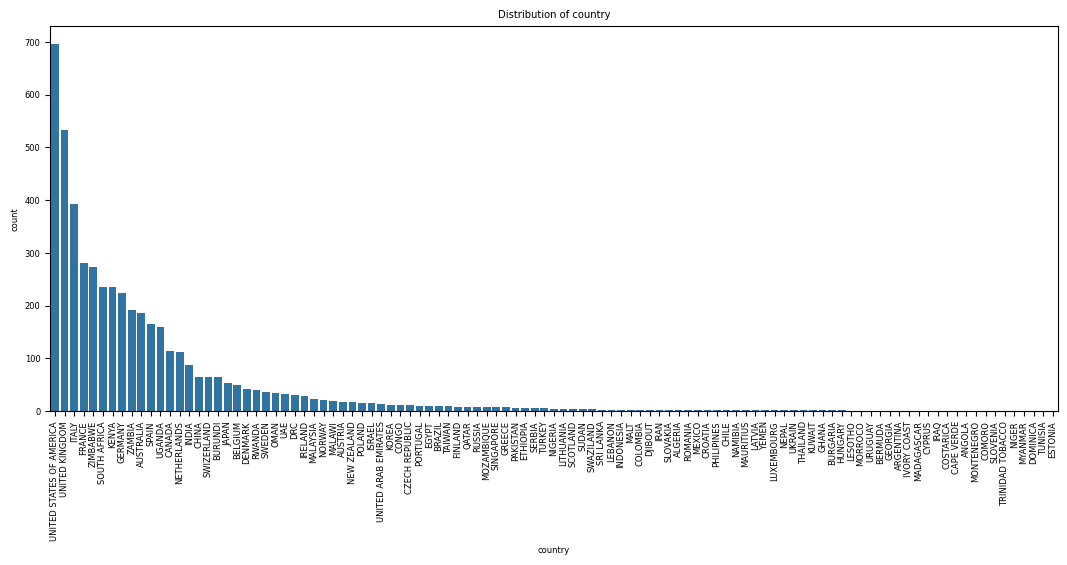

In [541]:
countplot(train_set,"country")

<Axes: ylabel='Density'>

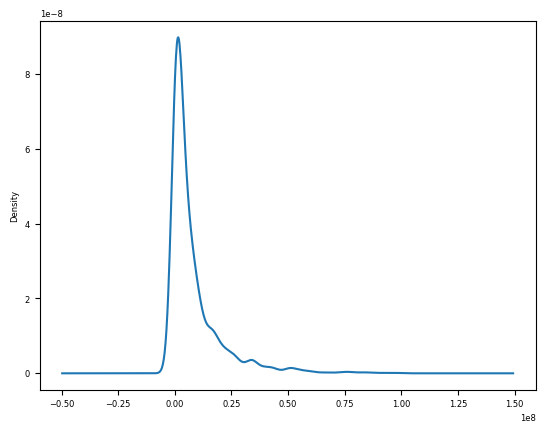

In [542]:
train_set["total_cost"].plot(kind="kde")

In [543]:
cate_cols = train_set.select_dtypes(include="object").columns
train_set[cate_cols] = train_set[cate_cols].astype("category")
test_set[cate_cols] = test_set[cate_cols].astype("category")

In [544]:
train_set.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [545]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def bayesian_feature_engineering_with_target(df_train, df_test, cat_cols, cont_cols, target_col):
    """
    Applique une transformation bayésienne aux variables catégoriques et continues avec information sur la cible.

    Arguments :
    df_train  -- DataFrame d'entraînement contenant les données
    df_test   -- DataFrame de test
    cat_cols  -- Liste des colonnes catégorielles
    cont_cols -- Liste des colonnes continues
    target_col -- Nom de la colonne cible

    Retourne :
    df_train_transformed -- DataFrame d'entraînement transformé
    df_test_transformed  -- DataFrame de test transformé
    """

    # Copie les DataFrames pour ne pas les modifier directement
    df_train_transformed = df_train.copy()
    df_test_transformed = df_test.copy()

    # Encodage bayésien des variables catégorielles avec la cible
    for col in cat_cols:
        print("colname: ", col)
        category_means = df_train.groupby(col)[target_col].mean()

        # Convert the column to a suitable numerical type before mapping
        df_train_transformed[col] = df_train_transformed[col].astype(str)
        df_test_transformed[col] = df_test_transformed[col].astype(str)

        # Apply the mapping
        df_train_transformed[col + '_bayes'] = df_train_transformed[col].map(category_means).astype(float)
        df_test_transformed[col + '_bayes'] = df_test_transformed[col].map(category_means).fillna(df_train[target_col].mean()).astype(float)


    # Transformation bayésienne des variables continues avec la target
    for col in cont_cols:
        # Calcul de la médiane et de l'écart-type sur les données d'entraînement
        mean_prior = df_train[col].median()
        #iqr = df_train[col].quantile(0.75) - df_train[col].quantile(0.25)
        scale_factor = max(df_train[col].std(), 0.1)  # Valeur minimale pour éviter explosion

        df_train_transformed[col + '_bayes'] = (df_train[col] - mean_prior) / scale_factor
        df_test_transformed[col + '_bayes'] = (df_test[col] - mean_prior) / scale_factor



    # Normalisation Min-Max pour les variables continues
    scaler = MinMaxScaler()
    for col in cont_cols:
        # Normaliser les données d'entraînement
        df_train_transformed[col + '_bayes'] = scaler.fit_transform(df_train_transformed[[col + '_bayes']])
        # Appliquer le même scaler sur les données de test
        df_test_transformed[col + '_bayes'] = scaler.transform(df_test_transformed[[col + '_bayes']])

    df_train_transformed = df_train_transformed.drop(columns=cat_cols + cont_cols)
    df_test_transformed = df_test_transformed.drop(columns=cat_cols + cont_cols)

    return df_train_transformed, df_test_transformed  # Supprimer les colonnes d'origine

In [546]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def bayesian_variance_ppm(df_train, df_test, cat_cols, cont_cols, target_col, alpha=5, lambda_=5):
    """
    Applique une transformation bayésienne pour la variance conditionnelle et le PPM.

    Arguments :
    df_train  -- DataFrame d'entraînement
    df_test   -- DataFrame de test
    cat_cols  -- Liste des colonnes catégoriques
    cont_cols -- Liste des colonnes continues
    target_col -- Nom de la colonne cible
    alpha     -- Hyperparamètre pour le lissage des variances conditionnelles
    lambda_   -- Hyperparamètre pour le Posterior Predictive Mean (PPM)

    Retourne :
    df_train_transformed, df_test_transformed -- DataFrames transformés
    """

    df_train_transformed = df_train.copy()
    df_test_transformed = df_test.copy()

    global_mean = df_train[target_col].mean()
    global_var = df_train[target_col].var()

    # 1️⃣ Variance conditionnelle et PPM pour les variables catégoriques
    for col in cat_cols:
        stats = df_train.groupby(col)[target_col].agg(['mean', 'var', 'count'])

        # Variance conditionnelle (avec régularisation pour éviter explosion)
        stats['cond_var'] = stats['var'] + alpha / (stats['count'] + alpha)

        # Posterior Predictive Mean (PPM)
        stats['ppm'] = (stats['mean'] * stats['count'] + lambda_ * global_mean) / (stats['count'] + lambda_)

        # Mapping des valeurs sur train et test
        df_train_transformed[col + '_cond_var'] = df_train_transformed[col].map(stats['cond_var'])
        df_test_transformed[col + '_cond_var'] = df_test_transformed[col].map(stats['cond_var'])

        df_train_transformed[col + '_ppm'] = df_train_transformed[col].map(stats['ppm'])
        df_test_transformed[col + '_ppm'] = df_test_transformed[col].map(stats['ppm'])

    # 2️⃣ Variance conditionnelle et PPM pour les variables continues
    for col in cont_cols:
        mean_prior = df_train[col].median()
        var_prior = df_train[col].var()
        count = df_train[col].count()

        df_train_transformed[col + '_ppm'] = (df_train[col] * count + lambda_ * global_mean) / (count + lambda_)
        df_test_transformed[col + '_ppm'] = (df_test[col] * count + lambda_ * global_mean) / (count + lambda_)

        df_train_transformed[col + '_cond_var'] = (df_train[col] - mean_prior) ** 2 + alpha / (count + alpha)
        df_test_transformed[col + '_cond_var'] = (df_test[col] - mean_prior) ** 2 + alpha / (count + alpha)

    # 🔥 Normalisation Min-Max
    scaler = MinMaxScaler()
    for col in cat_cols + cont_cols:
        for suffix in ['_ppm', '_cond_var']:
            transformed_col = col + suffix
            df_train_transformed[transformed_col] = scaler.fit_transform(df_train_transformed[[transformed_col]])
            df_test_transformed[transformed_col] = scaler.transform(df_test_transformed[[transformed_col]])

    return df_train_transformed, df_test_transformed


In [547]:
def binary_cat(df):
    cols = []
    for col in df:
        if df[col].nunique() == 2:
            cols.append(col)
    return cols

In [548]:
freq_cols = ["country"]
coded_cols = ['night_mainland', 'night_zanzibar']
one_hot_cols = ["age_group","purpose","main_activity","info_source","payment_mode"]
nan_cols = train_set.columns[train_set.isna().any()].tolist()
binary_cols = binary_cat(train_set)

all_select_cols = freq_cols+coded_cols+one_hot_cols+nan_cols+binary_cols

assert train_set.drop(columns = ["ID"]).shape[1]-1 == len(all_select_cols)

In [549]:
cat_cols = freq_cols+one_hot_cols+binary_cols
cont_cols = coded_cols

train_set,test_set = bayesian_feature_engineering_with_target(train_set,test_set,cat_cols,cont_cols,"total_cost")

colname:  country
colname:  age_group
colname:  purpose
colname:  main_activity
colname:  info_source
colname:  payment_mode
colname:  tour_arrangement
colname:  package_transport_int
colname:  package_accomodation
colname:  package_food
colname:  package_transport_tz
colname:  package_sightseeing
colname:  package_guided_tour
colname:  package_insurance
colname:  first_trip_tz


In [550]:
train_set.head()

,ID,travel_with,total_female,total_male,most_impressing,total_cost,country_bayes,age_group_bayes,purpose_bayes,main_activity_bayes,...,package_transport_int_bayes,package_accomodation_bayes,package_food_bayes,package_transport_tz_bayes,package_sightseeing_bayes,package_guided_tour_bayes,package_insurance_bayes,first_trip_tz_bayes,night_mainland_bayes,night_zanzibar_bayes
0,tour_0,Friends/Relatives,1.0,1.0,Friendly People,674602.5,1.105975e+07,1.105093e+07,1.195114e+07,1.059533e+07,...,4.670738e+06,2.897812e+06,3.504681e+06,3.841902e+06,4.887023e+06,4.969253e+06,6.704244e+06,4.037669e+06,0.089655,0.000000
1,tour_10,NaN,1.0,0.0,"Wonderful Country, Landscape, Nature",3214906.5,7.145183e+06,6.026176e+06,1.195114e+07,3.991139e+06,...,4.670738e+06,2.897812e+06,3.504681e+06,3.841902e+06,4.887023e+06,4.969253e+06,6.704244e+06,1.008298e+07,0.096552,0.114754
2,tour_1000,Alone,0.0,1.0,Excellent Experience,3315000.0,7.145183e+06,6.026176e+06,3.190776e+06,3.991139e+06,...,4.670738e+06,2.897812e+06,3.504681e+06,3.841902e+06,4.887023e+06,4.969253e+06,6.704244e+06,4.037669e+06,0.006897,0.508197
3,tour_1002,Spouse,1.0,1.0,Friendly People,7790250.0,7.145183e+06,6.026176e+06,1.195114e+07,1.059533e+07,...,4.670738e+06,1.426461e+07,1.426067e+07,1.471301e+07,1.530340e+07,1.472729e+07,6.704244e+06,1.008298e+07,0.075862,0.000000
4,tour_1004,NaN,1.0,0.0,No comments,1657500.0,6.609664e+06,5.415205e+06,1.195114e+07,1.059533e+07,...,4.670738e+06,2.897812e+06,3.504681e+06,3.841902e+06,4.887023e+06,4.969253e+06,6.704244e+06,1.008298e+07,0.048276,0.065574


In [551]:
cat_col = [col+"_bayes" for col in cat_cols]
cont_col = [col+"_bayes" for col in cont_cols]

train_set,test_set = bayesian_variance_ppm(train_set,test_set,cat_col,cont_col,"total_cost")

In [552]:
train_set.head()

,ID,travel_with,total_female,total_male,most_impressing,total_cost,country_bayes,age_group_bayes,purpose_bayes,main_activity_bayes,...,package_guided_tour_bayes_cond_var,package_guided_tour_bayes_ppm,package_insurance_bayes_cond_var,package_insurance_bayes_ppm,first_trip_tz_bayes_cond_var,first_trip_tz_bayes_ppm,night_mainland_bayes_ppm,night_mainland_bayes_cond_var,night_zanzibar_bayes_ppm,night_zanzibar_bayes_cond_var
0,tour_0,Friends/Relatives,1.0,1.0,Friendly People,674602.5,1.105975e+07,1.105093e+07,1.195114e+07,1.059533e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.089655,0.002536,0.000000,0.000000
1,tour_10,NaN,1.0,0.0,"Wonderful Country, Landscape, Nature",3214906.5,7.145183e+06,6.026176e+06,1.195114e+07,3.991139e+06,...,0.0,0.0,0.0,0.0,1.0,1.0,0.096552,0.003312,0.114754,0.013169
2,tour_1000,Alone,0.0,1.0,Excellent Experience,3315000.0,7.145183e+06,6.026176e+06,3.190776e+06,3.991139e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006897,0.001294,0.508197,0.258264
3,tour_1002,Spouse,1.0,1.0,Friendly People,7790250.0,7.145183e+06,6.026176e+06,1.195114e+07,1.059533e+07,...,1.0,1.0,0.0,0.0,1.0,1.0,0.075862,0.001294,0.000000,0.000000
4,tour_1004,NaN,1.0,0.0,No comments,1657500.0,6.609664e+06,5.415205e+06,1.195114e+07,1.059533e+07,...,0.0,0.0,0.0,0.0,1.0,1.0,0.048276,0.000052,0.065574,0.004300


In [553]:
test_set.head()

,ID,travel_with,total_female,total_male,most_impressing,country_bayes,age_group_bayes,purpose_bayes,main_activity_bayes,info_source_bayes,...,package_guided_tour_bayes_cond_var,package_guided_tour_bayes_ppm,package_insurance_bayes_cond_var,package_insurance_bayes_ppm,first_trip_tz_bayes_cond_var,first_trip_tz_bayes_ppm,night_mainland_bayes_ppm,night_mainland_bayes_cond_var,night_zanzibar_bayes_ppm,night_zanzibar_bayes_cond_var
0,tour_1,Spouse,1.0,1.0,Wildlife,1.474802e+07,1.105093e+07,1.195114e+07,1.059533e+07,1.312327e+07,...,1.0,1.0,1.0,1.0,1.0,1.0,0.068966,0.000828,0.049180,0.002419
1,tour_100,Friends/Relatives,0.0,4.0,"Wonderful Country, Landscape, Nature",1.104172e+07,6.026176e+06,1.782438e+06,1.059533e+07,3.142777e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.089655,0.002536,0.000000,0.000000
2,tour_1001,Friends/Relatives,3.0,0.0,No comments,9.947766e+06,6.026176e+06,1.195114e+07,7.524837e+06,4.310349e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.048276,0.000052,0.229508,0.052674
3,tour_1006,Friends/Relatives,2.0,0.0,Friendly People,1.282481e+07,8.114389e+06,1.195114e+07,3.991139e+06,4.524773e+06,...,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.001863,0.065574,0.004300
4,tour_1009,Friends/Relatives,2.0,2.0,Friendly People,7.145183e+06,1.105093e+07,1.195114e+07,1.059533e+07,4.310349e+06,...,0.0,0.0,0.0,0.0,1.0,1.0,0.068966,0.000828,0.000000,0.000000


In [554]:
train_set.head(3)

,ID,travel_with,total_female,total_male,most_impressing,total_cost,country_bayes,age_group_bayes,purpose_bayes,main_activity_bayes,...,package_guided_tour_bayes_cond_var,package_guided_tour_bayes_ppm,package_insurance_bayes_cond_var,package_insurance_bayes_ppm,first_trip_tz_bayes_cond_var,first_trip_tz_bayes_ppm,night_mainland_bayes_ppm,night_mainland_bayes_cond_var,night_zanzibar_bayes_ppm,night_zanzibar_bayes_cond_var
0,tour_0,Friends/Relatives,1.0,1.0,Friendly People,674602.5,1.105975e+07,1.105093e+07,1.195114e+07,1.059533e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.089655,0.002536,0.000000,0.000000
1,tour_10,NaN,1.0,0.0,"Wonderful Country, Landscape, Nature",3214906.5,7.145183e+06,6.026176e+06,1.195114e+07,3.991139e+06,...,0.0,0.0,0.0,0.0,1.0,1.0,0.096552,0.003312,0.114754,0.013169
2,tour_1000,Alone,0.0,1.0,Excellent Experience,3315000.0,7.145183e+06,6.026176e+06,3.190776e+06,3.991139e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.006897,0.001294,0.508197,0.258264


In [555]:
X = train_set.drop(["total_cost"],axis=1)
y = train_set["total_cost"]
X_to_fill = pd.concat([X,test_set],axis=0)
X_to_fill = X_to_fill.set_index("ID")

In [556]:
X_to_fill.loc[X_to_fill[nan_cols[1]] > 7, nan_cols[1]] = np.nan
X_to_fill.loc[X_to_fill[nan_cols[2]] > 6, nan_cols[2]] = np.nan

In [557]:
travel_with_dict = {'Alone':1,'Children':2,'Friends/Relatives':3,'Spouse':4,'Spouse and Children':5}
X_to_fill["travel_with"] = X_to_fill["travel_with"].map(travel_with_dict)

impression_dict = {'Satisfies and Hope Come Back': 7,
                   'Excellent Experience': 6,
                   'Wonderful Country, Landscape, Nature': 5,
                   'Good service': 4,
                   'Friendly People': 3,
                   'Wildlife': 2,
                   'No comments': 1}
X_to_fill["most_impressing"] = X_to_fill["most_impressing"].map(impression_dict)

In [558]:
def separate_nan_rows(df,col):
    """Sépare les lignes avec NaN et non-NaN dans un DataFrame pandas.

    Args:
        df: Le DataFrame pandas.

    Returns:
        Un tuple contenant deux DataFrames : le premier avec les lignes contenant des NaN,
        et le second avec les lignes ne contenant pas de NaN.
    """
    nan_rows = df[df[col].isnull()]
    not_nan_rows = df[df[col].notnull()]
    return not_nan_rows,nan_rows

In [559]:
from sklearn.ensemble import RandomForestClassifier

X_nan = X_to_fill[nan_cols]
X_not_nan = X_to_fill.drop(columns=nan_cols)

for col in nan_cols:
    X_not_nan[col] = X_nan[col]
    X_train,X_test = separate_nan_rows(X_not_nan,col)
    imputer_model = RandomForestClassifier(n_estimators=300, max_depth=7,random_state=42)
    imputer_model.fit(X_train.drop(columns=[col]),X_train[col])
    X_test[col] = imputer_model.predict(X_test.drop(columns=[col]))
    X_not_nan = pd.concat([X_train,X_test])

assert X_to_fill.shape == X_not_nan.shape
X_to_fill = X_not_nan

In [560]:
X_not_nan[nan_cols[3]].value_counts()

,count
most_impressing,
3.0,3808
1.0,1070
5.0,675
4.0,468
6.0,350
7.0,39


In [561]:
df_filled = X_to_fill

In [562]:
train_data = df_filled.loc[train_set.ID]
test_data = df_filled.loc[test_set.ID]

train_data["total_cost"] = y.values

In [563]:
train_data[nan_cols].head()

,travel_with,total_female,total_male,most_impressing
ID,,,,
tour_0,3,1.0,1.0,3.0
tour_10,3,1.0,0.0,5.0
tour_1000,1,0.0,1.0,6.0
tour_1002,4,1.0,1.0,3.0
tour_1004,3,1.0,0.0,1.0


In [564]:
train_data,test_data = bayesian_feature_engineering_with_target(train_data,test_data,[],nan_cols,"total_cost")

In [565]:
train_data.head(3)

,country_bayes,age_group_bayes,purpose_bayes,main_activity_bayes,info_source_bayes,payment_mode_bayes,tour_arrangement_bayes,package_transport_int_bayes,package_accomodation_bayes,package_food_bayes,...,first_trip_tz_bayes_ppm,night_mainland_bayes_ppm,night_mainland_bayes_cond_var,night_zanzibar_bayes_ppm,night_zanzibar_bayes_cond_var,total_cost,travel_with_bayes,total_female_bayes,total_male_bayes,most_impressing_bayes
ID,,,,,,,,,,,,,,,,,,,,,
tour_0,1.105975e+07,1.105093e+07,1.195114e+07,1.059533e+07,4.310349e+06,7.632609e+06,2.760664e+06,4.670738e+06,2.897812e+06,3.504681e+06,...,0.0,0.089655,0.002536,0.000000,0.000000,674602.5,0.5,0.142857,0.166667,0.333333
tour_10,7.145183e+06,6.026176e+06,1.195114e+07,3.991139e+06,4.524773e+06,7.632609e+06,2.760664e+06,4.670738e+06,2.897812e+06,3.504681e+06,...,1.0,0.096552,0.003312,0.114754,0.013169,3214906.5,0.5,0.142857,0.000000,0.666667
tour_1000,7.145183e+06,6.026176e+06,3.190776e+06,3.991139e+06,4.310349e+06,7.632609e+06,2.760664e+06,4.670738e+06,2.897812e+06,3.504681e+06,...,0.0,0.006897,0.001294,0.508197,0.258264,3315000.0,0.0,0.000000,0.166667,0.833333


In [566]:
nan_col = [col+"_bayes" for col in nan_cols]
train_data,test_data = bayesian_variance_ppm(train_data,test_data,nan_col,[],"total_cost")

In [567]:
train_data.head(3)

,country_bayes,age_group_bayes,purpose_bayes,main_activity_bayes,info_source_bayes,payment_mode_bayes,tour_arrangement_bayes,package_transport_int_bayes,package_accomodation_bayes,package_food_bayes,...,total_male_bayes,most_impressing_bayes,travel_with_bayes_cond_var,travel_with_bayes_ppm,total_female_bayes_cond_var,total_female_bayes_ppm,total_male_bayes_cond_var,total_male_bayes_ppm,most_impressing_bayes_cond_var,most_impressing_bayes_ppm
ID,,,,,,,,,,,,,,,,,,,,,
tour_0,1.105975e+07,1.105093e+07,1.195114e+07,1.059533e+07,4.310349e+06,7.632609e+06,2.760664e+06,4.670738e+06,2.897812e+06,3.504681e+06,...,0.166667,0.333333,0.665364,0.437656,0.117688,0.382617,0.091593,0.129315,0.846858,1.000000
tour_10,7.145183e+06,6.026176e+06,1.195114e+07,3.991139e+06,4.524773e+06,7.632609e+06,2.760664e+06,4.670738e+06,2.897812e+06,3.504681e+06,...,0.000000,0.666667,0.665364,0.437656,0.117688,0.382617,0.000000,0.000000,0.462455,0.697855
tour_1000,7.145183e+06,6.026176e+06,3.190776e+06,3.991139e+06,4.310349e+06,7.632609e+06,2.760664e+06,4.670738e+06,2.897812e+06,3.504681e+06,...,0.166667,0.833333,0.000000,0.000000,0.000000,0.000000,0.091593,0.129315,0.249270,0.542966


In [519]:
print(train_data.corr()["total_cost"].sort_values()[:10])

night_mainland_bayes_cond_var    -0.032265
most_impressing_bayes             0.012843
night_mainland_bayes_ppm          0.020473
night_mainland_bayes              0.020473
night_zanzibar_bayes_cond_var     0.038260
most_impressing_bayes_cond_var    0.048527
most_impressing_bayes_ppm         0.061390
payment_mode_bayes_cond_var       0.074891
payment_mode_bayes_ppm            0.104667
payment_mode_bayes                0.105529
Name: total_cost, dtype: float64


In [521]:
train_data.iloc[:,10:20].head(3)

,package_transport_tz_bayes,package_sightseeing_bayes,package_guided_tour_bayes,package_insurance_bayes,first_trip_tz_bayes,night_mainland_bayes,night_zanzibar_bayes,country_bayes_cond_var,country_bayes_ppm,age_group_bayes_cond_var
ID,,,,,,,,,,
tour_0,3.841902e+06,4.887023e+06,4.969253e+06,6.704244e+06,4.037669e+06,0.089655,0.000000,0.224346,0.722781,0.661413
tour_10,3.841902e+06,4.887023e+06,4.969253e+06,6.704244e+06,1.008298e+07,0.096552,0.114754,0.176549,0.448234,0.000000
tour_1000,3.841902e+06,4.887023e+06,4.969253e+06,6.704244e+06,4.037669e+06,0.006897,0.508197,0.176549,0.448234,0.000000


# Feature engineering

In [522]:
#train_data['night_mainland_log'] = np.log(1+train_data['night_mainland'])
#train_data['night_zanzibar_log'] = np.log(1+train_data['night_zanzibar'])

#test_data['night_mainland_log'] = np.log(1+test_data['night_mainland'])
#test_data['night_zanzibar_log'] = np.log(1+test_data['night_zanzibar'])

# Modélisation

In [523]:
from sklearn.ensemble import RandomForestRegressor

In [524]:
X,y = train_data.drop(columns=["total_cost"]),train_data["total_cost"]

In [525]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.15,random_state=42)

In [526]:
rf = RandomForestRegressor(n_estimators=300,max_depth=15,max_features='sqrt')
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=300)

In [527]:
y_ori_predict = rf.predict(X_train)
print(f"Mean absolute error:{mean_absolute_error(y_train,y_ori_predict)}")

Mean absolute error:2547802.136474434


Mean absolute error:4747133.301312126

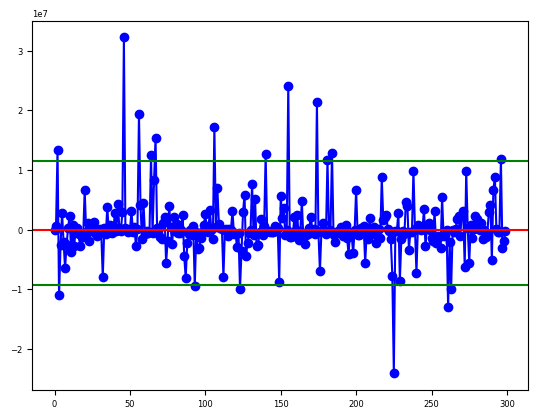

In [528]:
from scipy.stats import median_abs_deviation

residus_ori = y_train - y_ori_predict
#residus = y_test - y_pred
med = np.median(residus_ori)
# as the name it helps to detection outliers
mad = median_abs_deviation(residus_ori)
z_mad = np.abs((residus_ori- med) / mad)
std = np.std(residus_ori)

nbre_point = 300 #len(y_train)
plt.plot(range(nbre_point),residus_ori[:nbre_point], "bo-")
plt.axhline(np.mean(residus_ori),color="red")
plt.axhline(np.mean(residus_ori)+2.5*std,color="green")
plt.axhline(np.mean(residus_ori)-2*std,color="green")
plt.show()

In [529]:
from scipy.stats import median_abs_deviation
def filtrage_data(model, X_train, y_train):

    predictions_train = model.predict(X_train)
    residuals_train = y_train - predictions_train
    # Median des residus
    med = np.median(residuals_train)
    # as the name it helps to detection outliers
    mad = median_abs_deviation(residuals_train)
    z_mad = np.abs((residuals_train- med) / mad)

    moy = np.mean(residuals_train)
    std = np.std(residuals_train)
    # Defining bounds
    upper_bound = moy + 3*std
    lower_bound = moy - 2*std


    # outliers (We take the default threshold for z_mad as 3 but can be improved)
    outliers = np.where((z_mad> 3)| (residuals_train < lower_bound) | (residuals_train> upper_bound))[0]
    # Filter out outliers from the test data
    X_train_filtered = X_train.drop(index=X_train.index[outliers])
    y_train_filtered = y_train.drop(index=y_train.index[outliers])
    print(f"Number of outliers: {len(outliers)/len(y_train):.2%}")
    return X_train_filtered, y_train_filtered

X_filtered, y_filtered = filtrage_data(rf, X_train, y_train)

Number of outliers: 23.61%


# Data filtered

In [530]:
rf_model = RandomForestRegressor(n_estimators=400,max_depth=15,max_features='sqrt')
rf_model.fit(X_filtered,y_filtered)

RandomForestRegressor(max_depth=15, max_features='sqrt', n_estimators=400)

In [531]:
y_pred = rf_model.predict(X_test)
print(f"Mean absolute error:{mean_absolute_error(y_test,y_pred)}")

Mean absolute error:4265150.873451235


4362074.1516900575

In [532]:
test_pred = rf_model.predict(test_data)

In [533]:
sub_set["total_cost"] = test_pred

In [534]:
sub_set.to_csv("submission.csv",index=False)